In [61]:
#Import the required libraries
import keras #To build the CNN Model prepare data
import os #To Interact with the OS
import cv2 #Image Processing tool
import numpy as np #To deal with the data and process it
import pandas as pd #To display the data in a orgnised way
import tensorflow as tf #To build the CNN Model
import matplotlib.pyplot  as plt #To display images and plot figures
from PIL import Image #To process images

In [62]:
#Set the image size to reresize all the images into (im_size x im_size x 3)
global im_size
im_size = 50

In [63]:
from google.colab import drive #Access the Google Drive
drive.mount('/content/drive') #Mount the drive with the code

# List files in the Drive directory
file_list = !ls '/content/drive/MyDrive/Colab Notebooks/Projects/01_Image Classification2'
print("Files in Google Drive:")
print(file_list)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Files in Google Drive:
[" CIFAR\t    'Image Classification_Traffic_Colab_v3.ipynb'   model3.h5", ' Data\t     Image_classification_Traffic_local_v2.ipynb    requirements.txt', ' Database+   Image_classification_Traffic_Local_V2.py']


In [64]:
def image_processing(image_path = "path"): #Function to process images (Resize and Normlise images)

    im = cv2.imread(image_path) #Read the Image
    im = cv2.resize(im,(im_size, im_size)) #Resize the image
    im = im/255.0 #Normalise the image from (0 - 255) --> to (0 - 1)

    return im

In [65]:
#Get the path to the training data
Path = '/content/drive/MyDrive/Colab Notebooks/Projects/01_Image Classification2' #Current path

Path = Path + "/Data/Training/" #Folder of the training data
print(Path)

print (Path)
Classes = os.listdir(Path) #The name of the folders of the classes
print(f"\n{Classes}") #Print the classes

/content/drive/MyDrive/Colab Notebooks/Projects/01_Image Classification2/Data/Training/
/content/drive/MyDrive/Colab Notebooks/Projects/01_Image Classification2/Data/Training/

['Traffic light', 'Roundabout', 'Left', 'Speed 120', 'Speed 80', 'Speed 100', 'Stop', 'Right', 'Speed 60', 'Pedestrian']


/content/drive/MyDrive/Colab Notebooks/Projects/01_Image Classification2/Data/Training/
/content/drive/MyDrive/Colab Notebooks/Projects/01_Image Classification2/Data/Training/Traffic light
This image /content/drive/MyDrive/Colab Notebooks/Projects/01_Image Classification2/Data/Training/Traffic light/Traffic light_1.jpg 

This image /content/drive/MyDrive/Colab Notebooks/Projects/01_Image Classification2/Data/Training/Traffic light/Traffic light_2.jpg 

This image /content/drive/MyDrive/Colab Notebooks/Projects/01_Image Classification2/Data/Training/Traffic light/Traffic light_4.jpg 

This image /content/drive/MyDrive/Colab Notebooks/Projects/01_Image Classification2/Data/Training/Traffic light/Traffic light_3.jpg 

This image /content/drive/MyDrive/Colab Notebooks/Projects/01_Image Classification2/Data/Training/Traffic light/Traffic light_5.jpg 

/content/drive/MyDrive/Colab Notebooks/Projects/01_Image Classification2/Data/Training/Roundabout
This image /content/drive/MyDrive/Colab Not

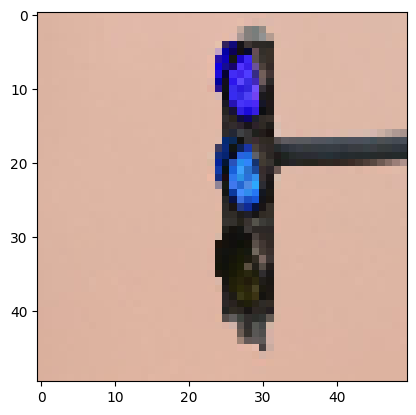

In [66]:
#Read the training data & label them based on folder name
global label_data
training_data = []
label_data = []

print(Path)
for inx,ima in enumerate(Classes):
    print(Path+ima)
    files = [f for f in os.listdir(Path+ima) if os.path.isfile(os.path.join(Path+ima, f))]
    files


    for file in files:
        this_image = Path+ima+"/"+file
        print("This image",this_image,"\n")

        try:
            im = image_processing(image_path = this_image) #Process this image to store the data in an array
            training_data.append([im, inx]) #Store the array and the index(class) in training_data
            label_data.append([inx,ima]) #Store the index and folder name(class) in label_data

        except Exception as e:
            print(f"\n\n\n Error processing this image:{this_image}\n\n\n")
            pass


print("\n\n The Shape of the image is: ",training_data[0][0].shape)

plt.imshow(training_data[1][0])
plt.show()

This image /content/drive/MyDrive/Colab Notebooks/Projects/01_Image Classification2/Data/Validation/Traffic light/Traffic light_2.jpg
This image /content/drive/MyDrive/Colab Notebooks/Projects/01_Image Classification2/Data/Validation/Traffic light/Traffic light_1.JPG
This image /content/drive/MyDrive/Colab Notebooks/Projects/01_Image Classification2/Data/Validation/Roundabout/Roundabout_2.jpg
This image /content/drive/MyDrive/Colab Notebooks/Projects/01_Image Classification2/Data/Validation/Roundabout/Roundabout_3.jpg
This image /content/drive/MyDrive/Colab Notebooks/Projects/01_Image Classification2/Data/Validation/Roundabout/Roundabout_1.jpg
This image /content/drive/MyDrive/Colab Notebooks/Projects/01_Image Classification2/Data/Validation/Roundabout/Roundabout_4.jpg
This image /content/drive/MyDrive/Colab Notebooks/Projects/01_Image Classification2/Data/Validation/Left/Left_2.jpg
This image /content/drive/MyDrive/Colab Notebooks/Projects/01_Image Classification2/Data/Validation/Left

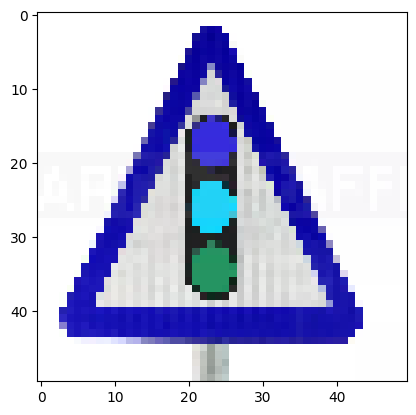

In [67]:
#Read the testing data & label them based on folder name

Path = '/content/drive/MyDrive/Colab Notebooks/Projects/01_Image Classification2' #Current path
Path=Path+"/Data/Validation/"
Path=Path.replace('\\', '/')
#print (Path)

testing_data = []
label_data2 = []
for inx,ima in enumerate(Classes):
    files = [f for f in os.listdir(Path+ima) if os.path.isfile(os.path.join(Path+ima, f))]


    for file in files:

        this_image = Path+ima+"/"+file

        print("This image",this_image)
        try:

            im = image_processing(image_path = this_image) #Process this image to store the data in an array
            testing_data.append([im, inx]) #Add the array data and the index in testing_data
            label_data2.append([inx,ima]) #Add the index and the folder name(class) in the label_data2


        except Exception as e:
            print(f"\n\n\n Error processing this image:{this_image}\n\n\n")

            pass


print("\n\n The Shape of the image is: ",testing_data[0][0].shape)

plt.imshow(testing_data[1][0])
plt.show()

In [68]:
#Get the labels names
label_data = pd.DataFrame(label_data) #Convert the label_data in a DataFrame
label_data = label_data[1].unique() #Store the unique values in label_data (each class)
print(label_data)

['Traffic light' 'Roundabout' 'Left' 'Speed 120' 'Speed 80' 'Speed 100'
 'Stop' 'Right' 'Speed 60' 'Pedestrian']


In [69]:
#Shuffle The training and testing data
import random
random.shuffle(training_data)
random.shuffle(testing_data)

In [70]:
#Seprate the features and labels in the training data  from [Features, label] => X = features, Y = Label

X_train = []
y_train = []
for features,label in training_data:
    X_train.append(features)
    y_train.append(label)
print("Number of training images:",len(y_train),"\nSample of the labels",y_train[:5])

Number of training images: 86 
Sample of the labels [5, 7, 4, 1, 5]


In [71]:
#Seprate the features and labels in the training data  from [Features, label] => X = features, Y = Label

X_test = []
y_test = []

for features,label in testing_data:
    X_test.append(features)
    y_test.append(label)

print("Number of testing images:",len(y_test),"\nExamples of the labels",y_test[:5])

Number of testing images: 36 
Examples of the labels [4, 2, 1, 3, 1]


In [72]:
#Reshape the features to (n x im_size x im_size x 3)

X_train = np.array(X_train).reshape(-1, im_size, im_size,3)
X_test = np.array(X_test).reshape(-1, im_size, im_size,3)

# Code

In [73]:
print("The shape of the training features is:",X_train.shape)
print("The shape of the testing features is:",X_test.shape)

The shape of the training features is: (86, 50, 50, 3)
The shape of the testing features is: (36, 50, 50, 3)


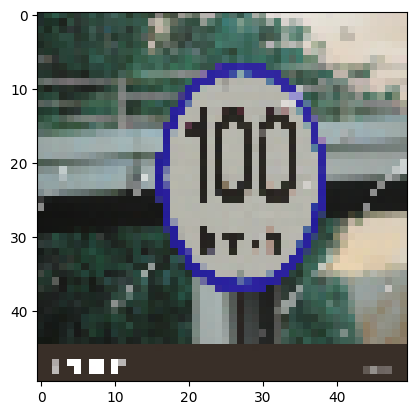

In [75]:
#Show an example from the training images
idx = 42
ex = X_train[idx].copy()
plt.imshow(ex)
plt.show()

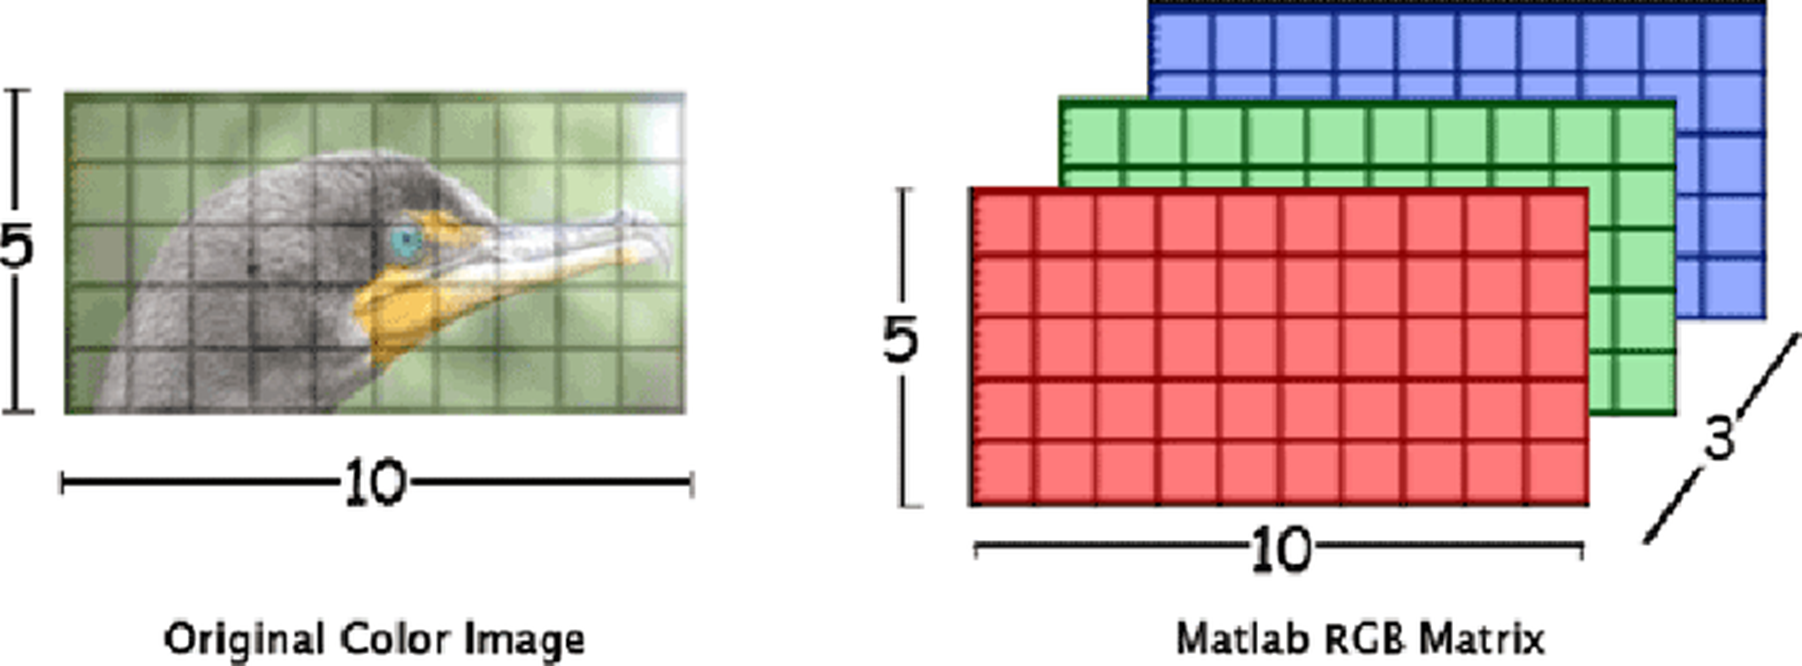

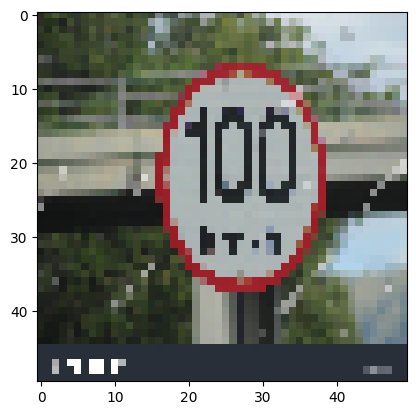

In [76]:
# Split the image into its BGR channels
blue_channel, green_channel, red_channel = cv2.split(ex)

# Stack the channels into a single NumPy array
ex = np.stack((red_channel, green_channel, blue_channel), axis=-1)


plt.imshow(ex)
plt.show()

In [77]:
#Impor the libraries for the NN

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.utils import np_utils
from keras.constraints import maxnorm
from keras.optimizers import SGD,Adam
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D,AveragePooling2D

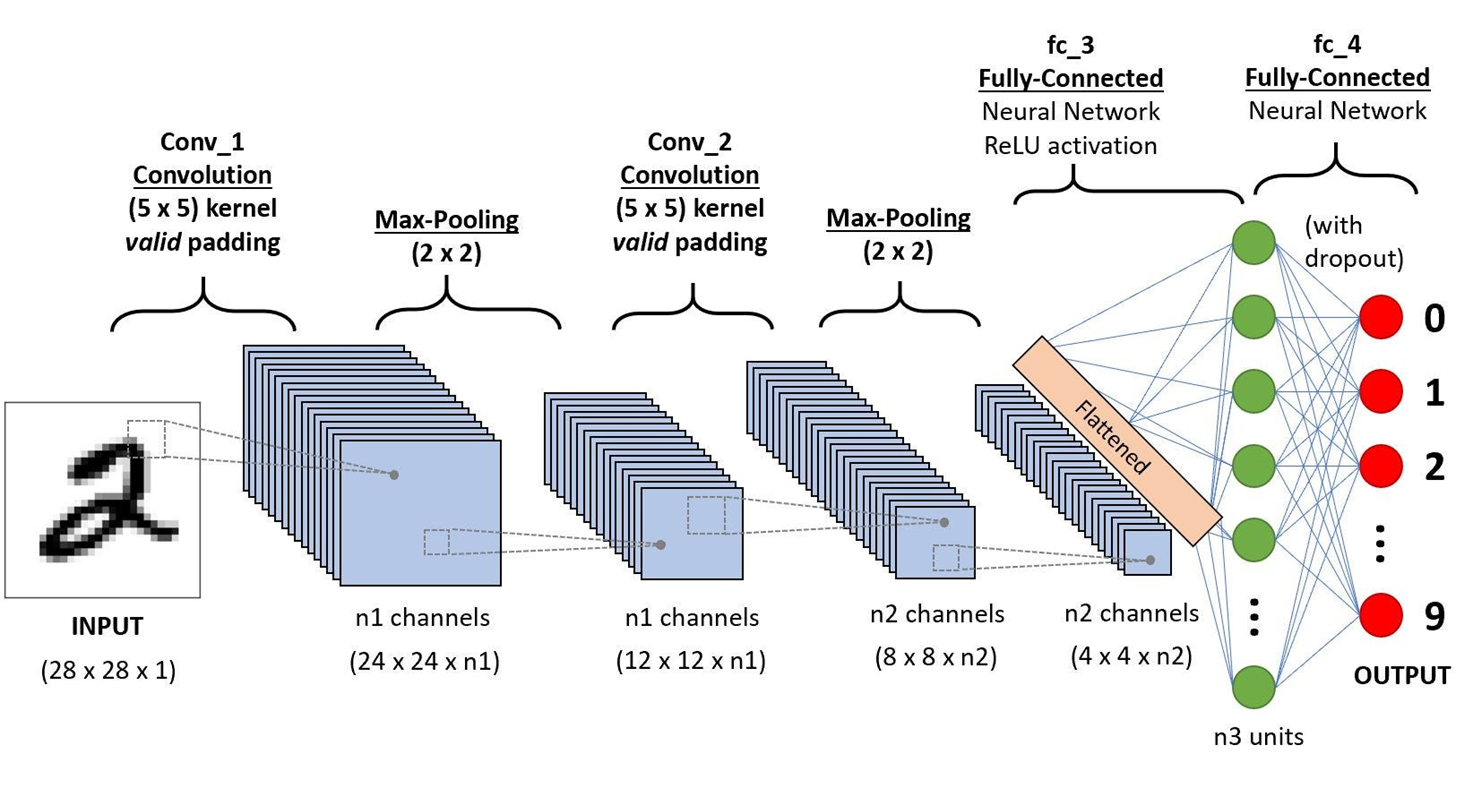

In [79]:
#Build the NN Architechture

model=Sequential()

#### model.add(Layer_Name(N of filters/kernels,(R x C size of the filters), strides = (Steps), input_shape = Shape of the input image [Width, Hieght, Depth], Activation_Func ('relu', 'linear', 'sigmoid', 'tanh'))

model.add(Conv2D(128,(3,3), strides=1, input_shape=[im_size, im_size, 3], activation='relu'))
model.add(MaxPooling2D(pool_size=(3,3)))
#model.add(AveragePooling2D(pool_size=(3,3)))


model.add(Conv2D(64,(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(3,3)))
#model.add(AveragePooling2D(pool_size=(3,3)))


# model.add(Conv2D(32,(3,3), activation='relu'))
# model.add(MaxPooling2D(pool_size=(3,3)))
# model.add(AveragePooling2D(pool_size=(3,3)))


#Flat the extracted data
model.add(Flatten())

#Fully Connected NN
model.add(Dense(200,activation='relu'))
# model.add(Dropout(0.1))

model.add(Dense(200,activation='relu'))

model.add(Dense(100,activation='relu'))
model.add(Dense(50,activation='relu'))
model.add(Dense(len(label_data), activation='softmax')) #softmax, relu, sigmoid, linear

In [80]:
model.compile(optimizer='Adam', loss='sparse_categorical_crossentropy', metrics=['accuracy']) #Adam, SGD

In [81]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 48, 48, 128)       3584      
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 16, 16, 128)      0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 14, 14, 64)        73792     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 4, 4, 64)         0         
 2D)                                                             
                                                                 
 flatten_4 (Flatten)         (None, 1024)              0         
                                                                 
 dense_20 (Dense)            (None, 200)              

In [82]:
#Prepare the training data
X_train = np.asarray(X_train).astype('float32').reshape((-1,im_size,im_size,3))
y_train = np.asarray(y_train).astype('float32').reshape((-1,1))

#Prepare the testing data
X_test = np.asarray(X_test).astype('float32').reshape((-1,im_size,im_size,3))
y_test = np.asarray(y_test).astype('float32').reshape((-1,1))

In [83]:
# Mount your Google Drive
drive.mount('/content/drive')

##Allow the program to store the traind model on your drive to access it later
file_path= "/content/drive/MyDrive/Colab Notebooks/Projects/001_Image Classification2/model3.h5"


##Save best model after training
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath=file_path,
                                                               monitor='val_accuracy',
                                                               save_best_only=True)


history = model.fit(X_train, y_train, epochs=30,
                    callbacks=[model_checkpoint_callback], verbose=1, validation_data=(X_test, y_test))
# history = model.fit(train_generator, epochs=25,validation_data = validation_generator, verbose = 1)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Epoch 1/30
3/3 [==============================] - 3s 703ms/step - loss: 2.3068 - accuracy: 0.1279 - val_loss: 2.2623 - val_accuracy: 0.1389
Epoch 2/30
3/3 [==============================] - 1s 234ms/step - loss: 2.2476 - accuracy: 0.1744 - val_loss: 2.2590 - val_accuracy: 0.1389
Epoch 3/30
3/3 [==============================] - 1s 244ms/step - loss: 2.2109 - accuracy: 0.2209 - val_loss: 2.2461 - val_accuracy: 0.1389
Epoch 4/30
3/3 [==============================] - 1s 223ms/step - loss: 2.1927 - accuracy: 0.1512 - val_loss: 2.2346 - val_accuracy: 0.1111
Epoch 5/30
3/3 [==============================] - 1s 288ms/step - loss: 2.1565 - accuracy: 0.1977 - val_loss: 2.2096 - val_accuracy: 0.1667
Epoch 6/30
3/3 [==============================] - 1s 218ms/step - loss: 2.1273 - accuracy: 0.1395 - val_loss: 2.1966 - val_accuracy: 0.1389
Epoch 7/30
3/3 [===============

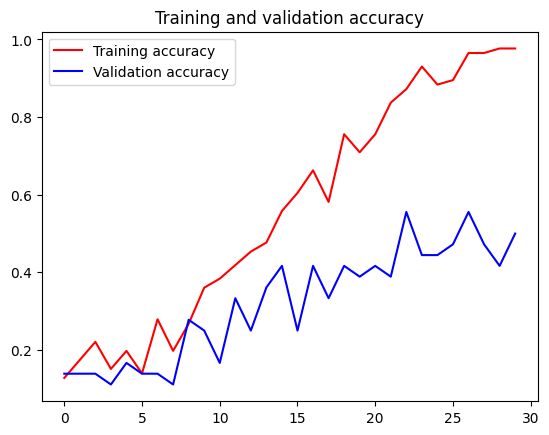

<Figure size 640x480 with 0 Axes>

In [84]:
import matplotlib.pyplot as plt

# Plot the results
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.show()

In [85]:
from google.colab import drive
from keras.models import load_model

# Mount your Google Drive
drive.mount('/content/drive')

# Load the model
model = load_model('/content/drive/MyDrive/Colab Notebooks/Projects/01_Image Classification2/model3.h5')


_,acc=model.evaluate(X_test,y_test)
print(acc*100)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
2/2 [==============================] - 0s 24ms/step - loss: 1.5885 - accuracy: 0.5833
58.33333134651184


In [86]:
import cv2
import numpy as np
import pandas as pd
from PIL import Image
from keras.models import load_model

# Mount your Google Drive
drive.mount('/content/drive')

## Load the model from the drive where it was saved
model = load_model('/content/drive/MyDrive/Colab Notebooks/Projects/01_Image Classification2/model3.h5')
im_size = 50


## Function to Display image
def image_display(full_path = "path"):
    image = Image.open(full_path)
    image.thumbnail((25, 25))  # Adjust the size of the thumbnail
    plt.imshow(image)


##Function to process and prepare the image (Read, Resize, Normalise)
def image_processing(full_path = "path"):
    image_display(full_path = full_path)
    im = cv2.imread(full_path)
    im = cv2.resize(im,(im_size, im_size))
    im = im/255.0

    return im


##Function to use the model to predict a new image
def model_pred(im_array):

    im_array = np.array(im_array).reshape(-1, im_size, im_size,3)

    pred=model.predict(im_array)
    pred = np.array(pred)
    pred = pred.reshape(-1,)
    idx = np.argmax(pred)
    print("\n-----------------------------------------------------\n")
    print("The index of the predicted class:",idx)
    class_ = Classes[idx]

    #The probabilty of other classes
    print("Predicted class: ",class_)

    # Calculate the sum of the values
    total = np.sum(pred)
    # Convert the values to percentages
    pred = (pred / total) * 100
    pred = pred.astype("int32")
    print("Probability of other classes: ", pred)
    display_data = pd.DataFrame([pred])
    display_data.columns = Classes
    display(display_data)



    return class_

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Select an image file from Google Drive:


Saving AlexNET CNN Arch.png to AlexNET CNN Arch.png
1/1 [==============================] - 0s 103ms/step

-----------------------------------------------------

The index of the predicted class: 1
Predicted class:  Roundabout
Probability of other classes:  [ 0 58 15  2  1  4  0  1 10  5]


,Traffic light,Roundabout,Left,Speed 120,Speed 80,Speed 100,Stop,Right,Speed 60,Pedestrian
0,0,58,15,2,1,4,0,1,10,5


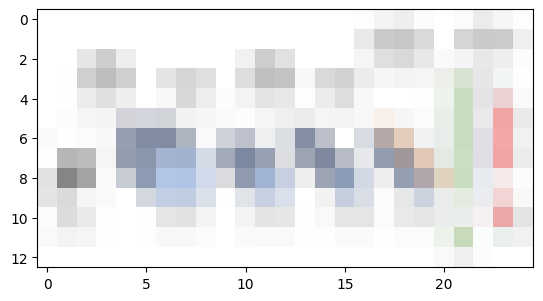

In [87]:
from google.colab import drive
from google.colab import files
from PIL import Image

# Mount your Google Drive
drive.mount('/content/drive')


# Prompt the user to select an image file from computer and upload it to drive
print("Select an image file from Google Drive:")
uploaded = files.upload()

# Extract the first uploaded file
image_path = list(uploaded.keys())[0]

# Process the image
image_array = image_processing(image_path)

# Use the image array for model prediction
prediction = model_pred(image_array)

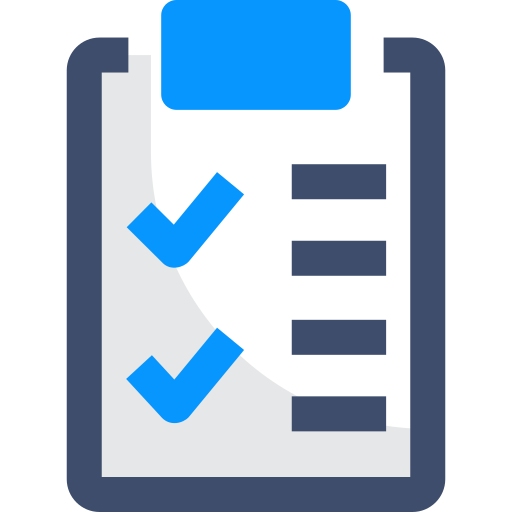

# **You need to complete the following Task one by one**
1. Keep the number of iterations 30 and try to enhance the accuracy of the model.

2. Add 2 more classes to the dataset by creating new folders with images in traning and validations folders

3. Search online for Confusion Matrix, and how to create one for this programe


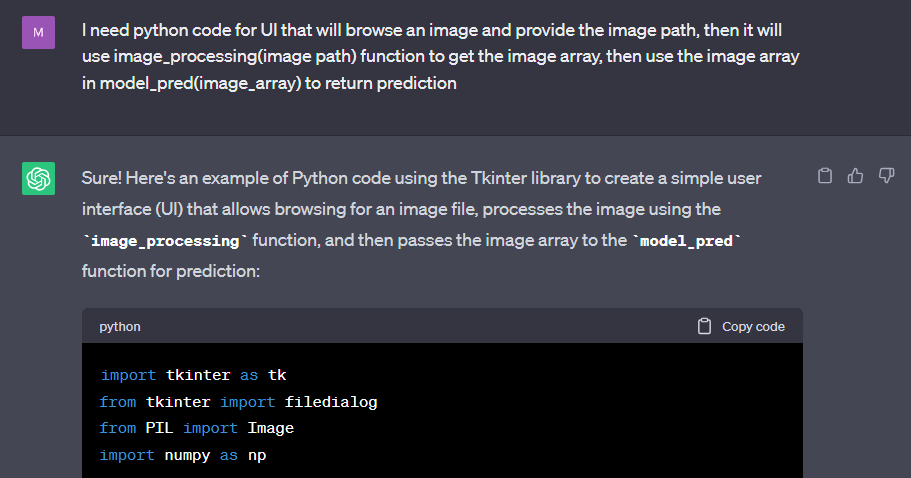

In [ ]:
### THIS NEED TO BE RUN LOCALLY ON MACHINE ---- NOT WORKING ON COLAB ####
import os
import cv2
import numpy as np
import pandas as pd
import tkinter as tk
from tkinter import *
from tkinter import filedialog
from PIL import ImageTk, Image
from keras.models import load_model


# label_data = ['Left', 'Pedestrian', 'Right', 'Roundabout', 'Speed 100', 'Speed 120', 'Speed 60', 'Speed 80', 'Stop', 'Traffic light']
# im_size =100

#load the trained model to classify the images
model = load_model('model3.h5')


#initialise GUI
top=tk.Tk()
top.geometry('800x600')
top.title('Image Classification')
top.configure(background='#CDCDCD')
label=Label(top,background='#CDCDCD', font=('arial',15,'bold'))
sign_image = Label(top)

def classify(file_path):
    global pred

    im = cv2.imread(file_path)
    im = cv2.resize(im,(im_size, im_size))
    #im = np.asarray(im).astype('float32').reshape((im_size,im_size,3))
    im=im/255.0
    im = np.array(im).reshape(-1, im_size, im_size,3)

    pred=model.predict(im)
    #print(pred)
    pred = np.array(pred)
    pred = pred.reshape(-1,)
    idx = np.argmax(pred)
    print("______________________________________________\nThe index of the predicted class:",idx)
    class_ = label_data[idx]
    label.configure(foreground='#011638', text=class_)


    #The probabilty of other classes
    print("Predicted image: ",class_)
    # Calculate the sum of the values
    total = np.sum(pred)

    # Convert the values to percentages
    pred = (pred / total) * 100
    pred = pred.astype("int32")
    print("Probability of other classes: ", pred)

    display_data = pd.DataFrame([pred])
    display_data.columns = label_data
    display(display_data)



def proba_():
    classify_b=Button(top,text=proba,
   command=lambda: classify(file_path),padx=10,pady=5)
    classify_b.configure(background='#364156', foreground='white',font=('arial',20,'bold'))
    classify_b.place(relx=0.79,rely=0.46)




def show_classify_button(file_path):
    classify_b=Button(top,text="Classify Image",
   command=lambda: classify(file_path),padx=10,pady=5)
    classify_b.configure(background='#364156', foreground='white',font=('arial',10,'bold'))
    classify_b.place(relx=0.79,rely=0.46)



def upload_image():
    try:
        file_path=filedialog.askopenfilename()
        uploaded=Image.open(file_path)
        uploaded.thumbnail(((top.winfo_width()/2.25),
    (top.winfo_height()/2.25)))
        im=ImageTk.PhotoImage(uploaded)
        sign_image.configure(image=im)
        sign_image.image=im
        label.configure(text='')
        show_classify_button(file_path)
    except:
        pass

upload=Button(top,text="Choose an image",command=upload_image,
  padx=10,pady=5)

upload.configure(background='#364156', foreground='white',
    font=('arial',10,'bold'))

upload.pack(side=BOTTOM,pady=50)
sign_image.pack(side=BOTTOM,expand=True)
label.pack(side=BOTTOM,expand=True)
heading = Label(top, text="Image Classification",pady=15, font=('arial',20,'bold'))

heading.configure(background='#CDCDCD',foreground='#364156')
heading.pack()



top.mainloop()